In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank = pd.read_csv('simulated_transaction_2024.csv')

bank.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.0,1584.0,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.0,-780.0,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.0,780.0,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.0,1825.0,NaN,Fat Face


In [3]:
# get list of all merchants
bank['Third Party Name'].unique()

array(['Westport Care Home', 'Barbiee Boutique', nan, 'Fat Face',
       'Lavender Primary', 'A Cut Above', 'Tesco', 'Brilliant Brushes',
       'Costa Coffee', 'Premier Finance', 'North Face', 'Craftastic',
       'Fitted Stitch', 'Selfridges', 'Starbucks', 'The Crown',
       'Cass Art', 'Green Park Academy', 'Rose & Crown', 'Kings Arms',
       'Sunny Care Nursery', 'A Yarn Story', 'Pets Corner',
       'Lavender Fields', 'Victoria Park', 'Halifax', 'LBG', 'Blizzard',
       'Xbox', 'Mojang Studios', 'PureGym', 'Disney', 'Netflix',
       'Grand Union BJJ', 'Amazon', 'SquareOnix', 'Deliveroo', 'JustEat',
       'Coop Local', 'Sainsbury', 'AMAZON', 'The Works', "Blackwell's",
       'Topshop', 'Matalan', 'Foyles', 'Wool', 'Hobby Lobby', 'Revella',
       'Sainsbury Local', 'Loosely Fitted', 'Stitch By Stitch',
       'Coffee #1', 'Hobbycraft', 'Lloyds Pharmacy', 'Gamestation', 'CeX',
       'Etsy', 'Five Senses Art', 'Sports Direct', 'Boots', 'Reebok',
       'JD Sports', 'Head', 'Fr

In [4]:
### Pre-process data only for merchant transactions out of the account (i.e. not salaries or personal transactions)

# Drop rows with positive transactions
merchant_transactions = bank[bank['Amount'] < 0]

# Drop all personal transactions, i.e. where 'Third Party Name' == NaN
merchant_transactions = merchant_transactions[merchant_transactions['Third Party Name'].notnull()]

merchant_transactions.tail()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
230591,06/12/2023,20:54,581655972.0,45935.206861,-41.06,NaN,Tesco
230592,06/12/2023,20:55,786141370.0,-244.837500,-62.35,NaN,Sainsbury Local
230593,06/12/2023,21:05,824916823.0,9709.172159,-32.94,NaN,Deliveroo
230594,06/12/2023,21:13,366550080.0,26834.165794,-19.25,NaN,Amazon
230595,06/12/2023,21:32,259015404.0,1145.349837,-37.64,NaN,JustEat


In [5]:
merchant_transactions['Third Party Name'].unique()

array(['Halifax', 'LBG', 'Blizzard', 'Xbox', 'Mojang Studios', 'PureGym',
       'Disney', 'Netflix', 'Grand Union BJJ', 'Amazon', 'SquareOnix',
       'Deliveroo', 'JustEat', 'Coop Local', 'Selfridges', 'Sainsbury',
       'AMAZON', 'The Works', "Blackwell's", 'Fat Face', 'Topshop',
       'Matalan', 'Foyles', 'Tesco', 'Wool', 'Hobby Lobby', 'Revella',
       'Sainsbury Local', 'Starbucks', 'Loosely Fitted',
       'Stitch By Stitch', 'Coffee #1', 'Hobbycraft', 'A Yarn Story',
       'Craftastic', 'Kings Arms', 'Costa Coffee', 'The Crown',
       'Lloyds Pharmacy', 'Rose & Crown', 'Fitted Stitch', 'Gamestation',
       'CeX', 'Etsy', 'Five Senses Art', 'Sports Direct', 'Cass Art',
       'Brilliant Brushes', 'Boots', 'Reebok', 'JD Sports', 'Head',
       'Frankie & Bennies', 'Gap Kids', 'North Face', 'Town High',
       'Collector Cave', 'Barbiee Boutique', 'RugbyFields',
       'Mamas & Papas', 'Lavender Primary', 'Remedy plus care',
       'Specsavers', 'Kew House', 'HMV', 'Vision E

In [50]:
stitch_by_stitch = merchant_transactions[merchant_transactions['Third Party Name'] == 'Stitch By Stitch']
loosely_fitted = merchant_transactions[merchant_transactions['Third Party Name'] == 'Loosely Fitted']
fitted_stitch = merchant_transactions[merchant_transactions['Third Party Name'] == 'Fitted Stitch']
kew_house = merchant_transactions[merchant_transactions['Third Party Name'] == 'Kew House']
town_high = merchant_transactions[merchant_transactions['Third Party Name'] == 'Town High']
lavender_primary = merchant_transactions[merchant_transactions['Third Party Name'] == 'Lavender Primary']

misc = pd.concat([stitch_by_stitch['Amount'].describe(), 
                loosely_fitted['Amount'].describe(), 
                fitted_stitch['Amount'].describe(), 
                kew_house['Amount'].describe(), 
                town_high['Amount'].describe(),
                lavender_primary['Amount'].describe()], axis=1)   

col_names = ['Stitch by Stitch', 'Loosely Fitted', 'Fitted Stitch', 'Kew House', 'Town High','Lavender Primary']
misc.columns = col_names
misc

,Stitch by Stitch,Loosely Fitted,Fitted Stitch,Kew House,Town High,Lavender Primary
count,454.000000,3718.000000,2923.000000,3.000000,2.000000,3.000000
mean,-26.200419,-59.246019,-51.084105,-203.333333,-140.000000,-163.333333
std,25.011503,60.571252,61.657668,102.632029,28.284271,104.083300
min,-164.850000,-371.000000,-373.800000,-290.000000,-160.000000,-280.000000
25%,-32.970000,-83.590000,-63.790000,-260.000000,-150.000000,-205.000000
50%,-17.990000,-38.895000,-27.910000,-230.000000,-140.000000,-130.000000
75%,-10.992500,-14.280000,-10.000000,-160.000000,-130.000000,-105.000000
max,-1.990000,-0.020000,-0.030000,-90.000000,-120.000000,-80.000000


- Kew house, town high and lavender primary are schools!

In [64]:
head = merchant_transactions[merchant_transactions['Third Party Name'] == 'Head']
collector_cave = merchant_transactions[merchant_transactions['Third Party Name'] == 'Collector Cave']

# concatenate the two dataframes
misc2 = pd.concat([head['Amount'].describe(), 
                collector_cave['Amount'].describe()], axis=1)

col_names = ['Head', 'Collector Cave']
misc2.columns = col_names
misc2

,Head,Collector Cave
count,1.0,3.000000
mean,-200.0,-143.326667
std,NaN,85.058804
min,-200.0,-230.000000
25%,-200.0,-185.000000
50%,-200.0,-140.000000
75%,-200.0,-99.990000
max,-200.0,-59.980000


- Collector cave is a vinyl/music shop

### Cafe

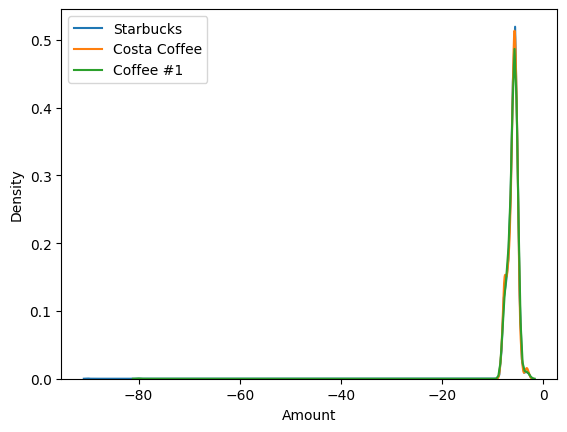

In [7]:
Starbucks = merchant_transactions[merchant_transactions['Third Party Name'] == 'Starbucks']
Costa_Coffee = merchant_transactions[merchant_transactions['Third Party Name'] == 'Costa Coffee']
Coffee_1 = merchant_transactions[merchant_transactions['Third Party Name'] == 'Coffee #1']

# plot kdensity plot for Starbucks
sns.kdeplot(Starbucks['Amount'], label='Starbucks')
sns.kdeplot(Costa_Coffee['Amount'], label='Costa Coffee')
sns.kdeplot(Coffee_1['Amount'], label='Coffee #1')

plt.legend()
plt.show()

- These all look sensible

### Game

<Axes: xlabel='Amount', ylabel='Density'>

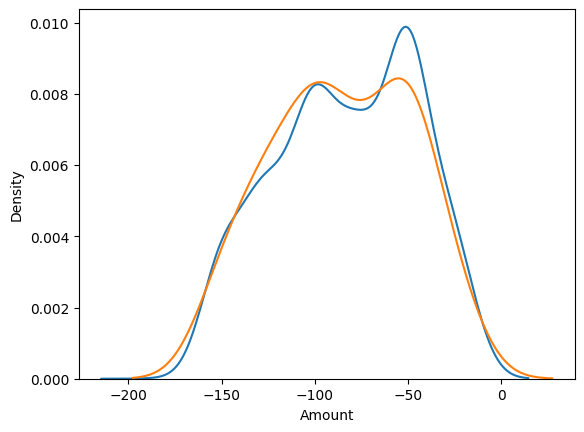

In [8]:
mojang_studios = merchant_transactions[merchant_transactions['Third Party Name'] == 'Mojang Studios']
xbox = merchant_transactions[merchant_transactions['Third Party Name'] == 'Xbox']
SquareOnix = merchant_transactions[merchant_transactions['Third Party Name'] == 'SquareOnix']
Blizzard = merchant_transactions[merchant_transactions['Third Party Name'] == 'Blizzard']
Gamestation = merchant_transactions[merchant_transactions['Third Party Name'] == 'Gamestation']
CeX = merchant_transactions[merchant_transactions['Third Party Name'] == 'CeX']
HMV = merchant_transactions[merchant_transactions['Third Party Name'] == 'HMV']

# plot kdensity plot for above gaming companies
#sns.kdeplot(mojang_studios['Amount'], label='Mojang Studios')
#sns.kdeplot(xbox['Amount'], label='Xbox')
#sns.kdeplot(SquareOnix['Amount'], label='SquareOnix')
#sns.kdeplot(Blizzard['Amount'], label='Blizzard')
sns.kdeplot(Gamestation['Amount'], label='Gamestation',bw_adjust=1.5)
sns.kdeplot(CeX['Amount'], label='CeX',bw_adjust=1.5)

- CeX and Gamestation are roughly aligned as they're similar types of store in terms of spending distributions

In [9]:
# concatenate describe() dataframes for all gaming companies
gaming_companies = pd.concat([mojang_studios['Amount'].describe(), 
                            xbox['Amount'].describe(), 
                            SquareOnix['Amount'].describe(), 
                            Blizzard['Amount'].describe(), 
                            HMV['Amount'].describe()], axis=1)
col_names = ['Mojang Studios', 'Xbox', 'SquareOnix', 'Blizzard','HMV']
gaming_companies.columns = col_names
gaming_companies

,Mojang Studios,Xbox,SquareOnix,Blizzard,HMV
count,4.369000e+03,4372.0,4.379000e+03,4.438000e+03,1.0
mean,-5.990000e+00,-7.0,-1.299000e+01,-1.499000e+01,-150.0
std,8.882801e-16,0.0,1.776560e-15,1.776557e-15,NaN
min,-5.990000e+00,-7.0,-1.299000e+01,-1.499000e+01,-150.0
25%,-5.990000e+00,-7.0,-1.299000e+01,-1.499000e+01,-150.0
50%,-5.990000e+00,-7.0,-1.299000e+01,-1.499000e+01,-150.0
75%,-5.990000e+00,-7.0,-1.299000e+01,-1.499000e+01,-150.0
max,-5.990000e+00,-7.0,-1.299000e+01,-1.499000e+01,-150.0


- SquareOnix and Blizzard seem to comparable in terms of mean and variance in spend.
- Mojang studios and Xbox are similar in mean and variance in spend.
- HMV has only a single transaction?

### Pub

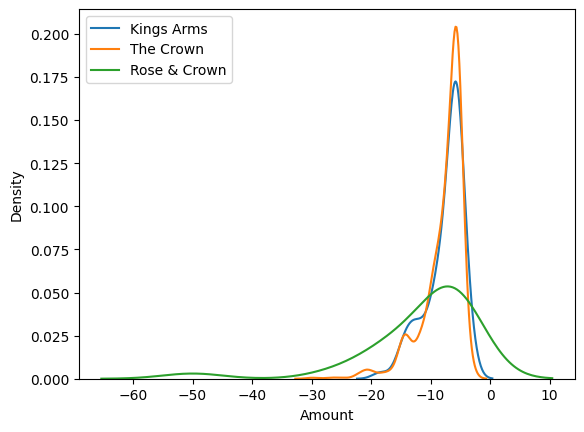

In [10]:
Kings_Arms = merchant_transactions[merchant_transactions['Third Party Name'] == 'Kings Arms']
The_Crown = merchant_transactions[merchant_transactions['Third Party Name'] == 'The Crown']
Rose_and_crown = merchant_transactions[merchant_transactions['Third Party Name'] == 'Rose & Crown']

# plot kdensity plot for above pubs
sns.kdeplot(Kings_Arms['Amount'], label='Kings Arms')
sns.kdeplot(The_Crown['Amount'], label='The Crown')
sns.kdeplot(Rose_and_crown['Amount'], label='Rose & Crown')

plt.legend()

plt.show()

In [11]:
# concatenate describe() dataframes for all pubs
pubs = pd.concat([Kings_Arms['Amount'].describe(), 
                            The_Crown['Amount'].describe(), 
                            Rose_and_crown['Amount'].describe()], axis=1)
col_names = ['Kings Arms', 'The Crown', 'Rose & Crown']
pubs.columns = col_names
pubs

,Kings Arms,The Crown,Rose & Crown
count,89.000000,753.000000,26.000000
mean,-7.555618,-7.862815,-11.532692
std,3.161203,3.558042,9.804641
min,-18.500000,-29.900000,-50.000000
25%,-9.000000,-9.400000,-14.500000
50%,-6.000000,-6.500000,-7.250000
75%,-5.300000,-5.500000,-5.600000
max,-3.500000,-3.500000,-4.900000


- Kings Arms and The Crown have similar mean and variance in spend but The Crown has significantly higher number of visits.
- Rose & Crown may be a more expensive pub?

### Entertainment

In [12]:
disney = merchant_transactions[merchant_transactions['Third Party Name'] == 'Disney']
netflix = merchant_transactions[merchant_transactions['Third Party Name'] == 'Netflix']
amazon = merchant_transactions[merchant_transactions['Third Party Name'] == 'Amazon']
AMAZON = merchant_transactions[merchant_transactions['Third Party Name'] == 'AMAZON']

# concatenate describe() dataframes for all streaming companies
streaming_companies = pd.concat([disney['Amount'].describe(), 
                            netflix['Amount'].describe(), 
                            amazon['Amount'].describe(), 
                            AMAZON['Amount'].describe()], axis=1)
col_names = ['Disney', 'Netflix', 'Amazon', 'AMAZON']
streaming_companies.columns = col_names
streaming_companies

,Disney,Netflix,Amazon,AMAZON
count,3.952000e+03,7.775000e+03,7571.000000,2026.000000
mean,-7.990000e+00,-1.599000e+01,-16.272741,-23.598702
std,1.776582e-15,3.552942e-15,16.220929,19.770354
min,-7.990000e+00,-1.599000e+01,-88.120000,-88.620000
25%,-7.990000e+00,-1.599000e+01,-20.425000,-34.790000
50%,-7.990000e+00,-1.599000e+01,-7.990000,-18.745000
75%,-7.990000e+00,-1.599000e+01,-7.990000,-7.105000
max,-7.990000e+00,-1.599000e+01,-0.020000,-0.030000


- Unclear, but obvious that disney and netflix should belong in a category.

### Gym/Fitness

In [51]:
puregym = merchant_transactions[merchant_transactions['Third Party Name'] == 'PureGym']
bjj_union = merchant_transactions[merchant_transactions['Third Party Name'] == 'Grand Union BJJ']

# concatenate describe() dataframes for all gyms
gyms = pd.concat([puregym['Amount'].describe(), 
                            bjj_union['Amount'].describe()], axis=1)
col_names = ['PureGym', 'BJJ Union']
gyms.columns = col_names
gyms

,PureGym,BJJ Union
count,8.286000e+03,3657.000000
mean,-1.899000e+01,-92.595406
std,3.552928e-15,23.976992
min,-1.899000e+01,-234.980000
25%,-1.899000e+01,-100.000000
50%,-1.899000e+01,-100.000000
75%,-1.899000e+01,-100.000000
max,-1.899000e+01,-5.990000


- BJJ Union only pays salaries.

### Pharmacies

In [14]:
boots = merchant_transactions[merchant_transactions['Third Party Name'] == 'Boots']
lloyds_pharmacy = merchant_transactions[merchant_transactions['Third Party Name'] == 'Lloyds Pharmacy']

# concatenate describe() dataframes for all pharmacies
pharmacies = pd.concat([boots['Amount'].describe(), 
                            lloyds_pharmacy['Amount'].describe()], axis=1)
col_names = ['Boots', 'Lloyds Pharmacy']
pharmacies.columns = col_names
pharmacies

,Boots,Lloyds Pharmacy
count,2046.000000,1997.000000
mean,-23.300303,-24.232168
std,19.675742,20.679275
min,-88.980000,-210.000000
25%,-34.905000,-36.120000
50%,-17.720000,-18.190000
75%,-6.935000,-7.700000
max,-0.020000,-0.010000


<Axes: xlabel='Amount', ylabel='Density'>

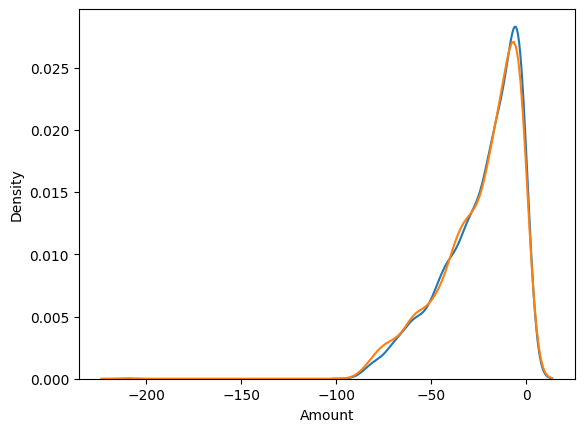

In [15]:
# kde plot for all pharmacies
sns.kdeplot(boots['Amount'], label='Boots')
sns.kdeplot(lloyds_pharmacy['Amount'], label='Lloyds Pharmacy')

- These look to be similar in business area and spending

### Bookshops & stationary

In [16]:
blackwells = merchant_transactions[merchant_transactions['Third Party Name'] == "Blackwell's"]
foyles = merchant_transactions[merchant_transactions['Third Party Name'] == 'Foyles']
# concatenate describe() dataframes for all bookstores
bookstores = pd.concat([blackwells['Amount'].describe(), 
                            foyles['Amount'].describe()], axis=1)
col_names = ['Blackwells', 'Foyles']
bookstores.columns = col_names
bookstores

,Blackwells,Foyles
count,3846.000000,26.000000
mean,-23.794074,-33.572308
std,12.961536,21.106784
min,-130.000000,-100.000000
25%,-31.960000,-41.200000
50%,-22.960000,-28.455000
75%,-13.010000,-19.972500
max,-4.990000,-5.990000


### Online shopping

In [17]:
etsy = merchant_transactions[merchant_transactions['Third Party Name'] == 'Etsy']
matalan = merchant_transactions[merchant_transactions['Third Party Name'] == 'Matalan']
# compare with amazon also

# concatenate describe() dataframes for all online shopping including AMAZON and Amazon
online_shopping = pd.concat([etsy['Amount'].describe(), 
                            matalan['Amount'].describe(),
                            amazon['Amount'].describe(),
                            AMAZON['Amount'].describe()], axis=1)
col_names = ['Etsy', 'Matalan', 'Amazon', 'AMAZON']
online_shopping.columns = col_names
online_shopping

,Etsy,Matalan,Amazon,AMAZON
count,1971.000000,7846.000000,7571.000000,2026.000000
mean,-23.371761,-96.207864,-16.272741,-23.598702
std,19.920466,73.603421,16.220929,19.770354
min,-88.210000,-395.500000,-88.120000,-88.620000
25%,-34.835000,-143.250000,-20.425000,-34.790000
50%,-17.450000,-82.015000,-7.990000,-18.745000
75%,-7.025000,-34.875000,-7.990000,-7.105000
max,-0.010000,-0.010000,-0.020000,-0.030000


- Etsy and AMAZON look identical.
- Matalan not an online retailer so makes sense it's different.
- Amazon has lower average spend and much higher number of transactions/visits??

### Arts and Crafts Stores

In [59]:
merchant_transactions['Third Party Name'].unique()

array(['Halifax', 'LBG', 'Blizzard', 'Xbox', 'Mojang Studios', 'PureGym',
       'Disney', 'Netflix', 'Grand Union BJJ', 'Amazon', 'SquareOnix',
       'Deliveroo', 'JustEat', 'Coop Local', 'Selfridges', 'Sainsbury',
       'AMAZON', 'The Works', "Blackwell's", 'Fat Face', 'Topshop',
       'Matalan', 'Foyles', 'Tesco', 'Wool', 'Hobby Lobby', 'Revella',
       'Sainsbury Local', 'Starbucks', 'Loosely Fitted',
       'Stitch By Stitch', 'Coffee #1', 'Hobbycraft', 'A Yarn Story',
       'Craftastic', 'Kings Arms', 'Costa Coffee', 'The Crown',
       'Lloyds Pharmacy', 'Rose & Crown', 'Fitted Stitch', 'Gamestation',
       'CeX', 'Etsy', 'Five Senses Art', 'Sports Direct', 'Cass Art',
       'Brilliant Brushes', 'Boots', 'Reebok', 'JD Sports', 'Head',
       'Frankie & Bennies', 'Gap Kids', 'North Face', 'Town High',
       'Collector Cave', 'Barbiee Boutique', 'RugbyFields',
       'Mamas & Papas', 'Lavender Primary', 'Remedy plus care',
       'Specsavers', 'Kew House', 'HMV', 'Vision E

In [60]:
hobby_lobby = merchant_transactions[merchant_transactions['Third Party Name'] == 'Hobby Lobby']
hobbycraft = merchant_transactions[merchant_transactions['Third Party Name'] == 'Hobbycraft']
the_works = merchant_transactions[merchant_transactions['Third Party Name'] == 'The Works']
craftastic = merchant_transactions[merchant_transactions['Third Party Name'] == 'Craftastic']
cass_art = merchant_transactions[merchant_transactions['Third Party Name'] == 'Cass Art']
a_yarn_story = merchant_transactions[merchant_transactions['Third Party Name'] == 'A Yarn Story']
five_senses_art = merchant_transactions[merchant_transactions['Third Party Name'] == 'Five Senses Art']
wool = merchant_transactions[merchant_transactions['Third Party Name'] == 'Wool']
stitch_by_stitch = merchant_transactions[merchant_transactions['Third Party Name'] == 'Stitch By Stitch']
brilliant_brushes = merchant_transactions[merchant_transactions['Third Party Name'] == 'Brilliant Brushes']
# concatenate describe() dataframes for all art and craft stores
art_and_craft = pd.concat([hobby_lobby['Amount'].describe(),
                            hobbycraft['Amount'].describe(),
                            the_works['Amount'].describe(),
                            craftastic['Amount'].describe(),
                            cass_art['Amount'].describe(),
                            a_yarn_story['Amount'].describe(),
                            five_senses_art['Amount'].describe(),
                            wool['Amount'].describe(),
                            stitch_by_stitch['Amount'].describe(), 
                            brilliant_brushes['Amount'].describe()],axis=1)

col_names = ['Hobby Lobby','Hobbycraft', 'The Works', 'Craftastic', 'Cass Art','A yarn Story','Five Senses Art','Wool','Stitch By Stitch','brilliant_brushes']
art_and_craft.columns = col_names
art_and_craft

,Hobby Lobby,Hobbycraft,The Works,Craftastic,Cass Art,A yarn Story,Five Senses Art,Wool,Stitch By Stitch,brilliant_brushes
count,1669.000000,80.000000,6697.000000,329.000000,262.000000,280.000000,5955.000000,1995.000000,454.000000,1619.000000
mean,-25.642241,-38.484250,-23.332764,-28.564894,-29.087099,-24.543714,-31.547204,-20.171063,-26.200419,-31.324873
std,24.286045,35.710106,12.794785,25.765955,25.243525,23.789335,24.476032,22.788463,25.011503,24.790327
min,-219.800000,-250.000000,-75.910000,-250.000000,-143.840000,-180.340000,-150.270000,-220.240000,-164.850000,-130.230000
25%,-34.970000,-55.700000,-31.290000,-38.650000,-45.512500,-34.127500,-49.980000,-23.970000,-32.970000,-49.990000
50%,-16.980000,-30.015000,-22.090000,-21.480000,-20.110000,-16.500000,-26.040000,-12.230000,-17.990000,-23.970000
75%,-8.500000,-14.992500,-12.980000,-10.030000,-9.990000,-7.980000,-11.870000,-7.500000,-10.992500,-11.490000
max,-1.500000,-1.500000,-4.990000,-1.500000,-1.500000,-1.990000,-1.500000,-1.990000,-1.990000,-1.500000


In [61]:
foyles = merchant_transactions[merchant_transactions['Third Party Name'] == 'Foyles']
books_supplies = pd.concat([blackwells['Amount'].describe(),
                            the_works['Amount'].describe(),
                            foyles['Amount'].describe()],axis=1)
col_names = ['Blackwells','The Works','Foyles']
books_supplies.columns = col_names
books_supplies

,Blackwells,The Works,Foyles
count,3846.000000,6697.000000,26.000000
mean,-23.794074,-23.332764,-33.572308
std,12.961536,12.794785,21.106784
min,-130.000000,-75.910000,-100.000000
25%,-31.960000,-31.290000,-41.200000
50%,-22.960000,-22.090000,-28.455000
75%,-13.010000,-12.980000,-19.972500
max,-4.990000,-4.990000,-5.990000


- Five Senses Art has a similar std but higher average spend so could still be grouped together.

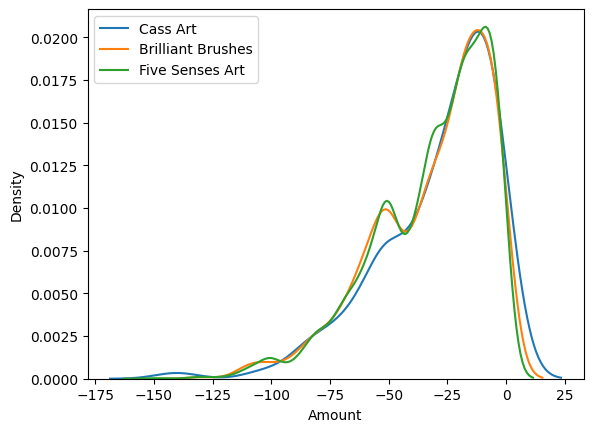

In [20]:

#kde plot for all art and craft stores
sns.kdeplot(cass_art['Amount'], label='Cass Art')
sns.kdeplot(brilliant_brushes['Amount'], label='Brilliant Brushes')
sns.kdeplot(five_senses_art['Amount'], label='Five Senses Art')
plt.legend()    
plt.show()


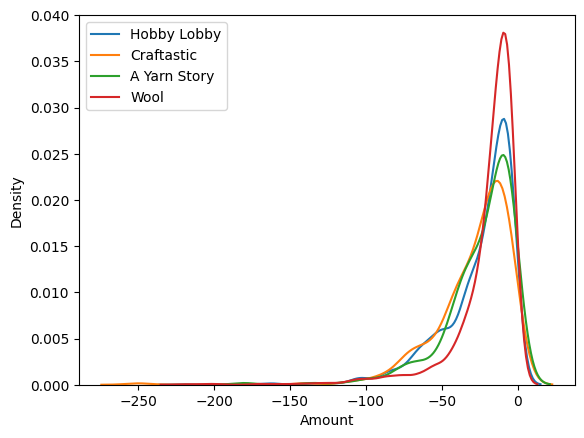

In [21]:
sns.kdeplot(hobby_lobby['Amount'], label='Hobby Lobby')
#sns.kdeplot(the_works['Amount'], label='The Works')
sns.kdeplot(craftastic['Amount'], label='Craftastic')
sns.kdeplot(a_yarn_story['Amount'], label='A Yarn Story')
sns.kdeplot(wool['Amount'], label='Wool')

plt.legend()    
plt.show()

- All align quite closely but the Works is a toy store..

### Outdoor clothing/clothing shops

In [57]:
merchant_transactions['Third Party Name'].unique()

array(['Halifax', 'LBG', 'Blizzard', 'Xbox', 'Mojang Studios', 'PureGym',
       'Disney', 'Netflix', 'Grand Union BJJ', 'Amazon', 'SquareOnix',
       'Deliveroo', 'JustEat', 'Coop Local', 'Selfridges', 'Sainsbury',
       'AMAZON', 'The Works', "Blackwell's", 'Fat Face', 'Topshop',
       'Matalan', 'Foyles', 'Tesco', 'Wool', 'Hobby Lobby', 'Revella',
       'Sainsbury Local', 'Starbucks', 'Loosely Fitted',
       'Stitch By Stitch', 'Coffee #1', 'Hobbycraft', 'A Yarn Story',
       'Craftastic', 'Kings Arms', 'Costa Coffee', 'The Crown',
       'Lloyds Pharmacy', 'Rose & Crown', 'Fitted Stitch', 'Gamestation',
       'CeX', 'Etsy', 'Five Senses Art', 'Sports Direct', 'Cass Art',
       'Brilliant Brushes', 'Boots', 'Reebok', 'JD Sports', 'Head',
       'Frankie & Bennies', 'Gap Kids', 'North Face', 'Town High',
       'Collector Cave', 'Barbiee Boutique', 'RugbyFields',
       'Mamas & Papas', 'Lavender Primary', 'Remedy plus care',
       'Specsavers', 'Kew House', 'HMV', 'Vision E

In [58]:

mountain_warehouse = merchant_transactions[merchant_transactions['Third Party Name'] == 'Mountain Warehouse']
millets = merchant_transactions[merchant_transactions['Third Party Name'] == 'Millets']
fat_face = merchant_transactions[merchant_transactions['Third Party Name'] == 'Fat Face']
north_face = merchant_transactions[merchant_transactions['Third Party Name'] == 'North Face']
ravella = merchant_transactions[merchant_transactions['Third Party Name'] == 'Ravella']
topshop = merchant_transactions[merchant_transactions['Third Party Name'] == 'Topshop']
fitted_stitch = merchant_transactions[merchant_transactions['Third Party Name'] == 'Fitted Stitch']
selfridges = merchant_transactions[merchant_transactions['Third Party Name'] == 'Selfridges']
revella = merchant_transactions[merchant_transactions['Third Party Name'] == 'Revella']
# concatenate describe() dataframes for all clothing stores including Matalan
clothing_stores = pd.concat([mountain_warehouse['Amount'].describe(), 
                            millets['Amount'].describe(),
                            fat_face['Amount'].describe(),
                            north_face['Amount'].describe(),
                            ravella['Amount'].describe(),
                            topshop['Amount'].describe(),
                            matalan['Amount'].describe(),
                            fitted_stitch['Amount'].describe(),
                            selfridges['Amount'].describe(),
                            revella['Amount'].describe()], axis=1)
col_names = ['Mountain Warehouse', 'Millets', 'Fat Face', 'North Face',  'Ravella', 'Topshop', 'Matalan','Fitted Stitch','Selfridges','Revella']
clothing_stores.columns = col_names
clothing_stores

,Mountain Warehouse,Millets,Fat Face,North Face,Ravella,Topshop,Matalan,Fitted Stitch,Selfridges,Revella
count,1.0,1.0,9308.000000,2.000000,0.0,10328.000000,7846.000000,2923.000000,3042.000000,5354.000000
mean,-30.0,-70.0,-103.238145,-270.000000,NaN,-103.670630,-96.207864,-51.084105,-56.607456,-86.864985
std,NaN,NaN,74.258006,42.426407,NaN,73.423712,73.603421,61.657668,65.477645,73.546195
min,-30.0,-70.0,-429.800000,-300.000000,NaN,-402.500000,-395.500000,-373.800000,-368.200000,-388.500000
25%,-30.0,-70.0,-151.190000,-285.000000,NaN,-151.862500,-143.250000,-63.790000,-72.082500,-133.000000
50%,-30.0,-70.0,-91.000000,-270.000000,NaN,-91.680000,-82.015000,-27.910000,-31.900000,-67.520000
75%,-30.0,-70.0,-44.467500,-255.000000,NaN,-44.500000,-34.875000,-10.000000,-11.150000,-25.490000
max,-30.0,-70.0,-0.010000,-240.000000,NaN,-0.020000,-0.010000,-0.030000,-0.020000,-0.020000


- Fat face, Topshop, revella, matalan are quite similar. North Face is quite more expensive.
- millets and mountain warehouse only have a single transaction.
- Stitch by Stitch and Ravella don't have any in this merchant transaction dataset.
- Fitted stitch as well is a new one and is similar to selfridges?

### Food delivery


In [55]:
merchant_transactions['Third Party Name'].unique()  

array(['Halifax', 'LBG', 'Blizzard', 'Xbox', 'Mojang Studios', 'PureGym',
       'Disney', 'Netflix', 'Grand Union BJJ', 'Amazon', 'SquareOnix',
       'Deliveroo', 'JustEat', 'Coop Local', 'Selfridges', 'Sainsbury',
       'AMAZON', 'The Works', "Blackwell's", 'Fat Face', 'Topshop',
       'Matalan', 'Foyles', 'Tesco', 'Wool', 'Hobby Lobby', 'Revella',
       'Sainsbury Local', 'Starbucks', 'Loosely Fitted',
       'Stitch By Stitch', 'Coffee #1', 'Hobbycraft', 'A Yarn Story',
       'Craftastic', 'Kings Arms', 'Costa Coffee', 'The Crown',
       'Lloyds Pharmacy', 'Rose & Crown', 'Fitted Stitch', 'Gamestation',
       'CeX', 'Etsy', 'Five Senses Art', 'Sports Direct', 'Cass Art',
       'Brilliant Brushes', 'Boots', 'Reebok', 'JD Sports', 'Head',
       'Frankie & Bennies', 'Gap Kids', 'North Face', 'Town High',
       'Collector Cave', 'Barbiee Boutique', 'RugbyFields',
       'Mamas & Papas', 'Lavender Primary', 'Remedy plus care',
       'Specsavers', 'Kew House', 'HMV', 'Vision E

In [56]:
deliveroo = merchant_transactions[merchant_transactions['Third Party Name'] == 'Deliveroo']
just_eat = merchant_transactions[merchant_transactions['Third Party Name'] == 'JustEat']
frankie_and_bennys = merchant_transactions[merchant_transactions['Third Party Name'] == 'Frankie & Bennies']
# concatenate describe() dataframes for all food delivery services
food_delivery = pd.concat([deliveroo['Amount'].describe(), 
                            just_eat['Amount'].describe(),
                            frankie_and_bennys['Amount'].describe()], axis=1)
col_names = ['Deliveroo', 'JustEat', 'Frankie & Bennys']
food_delivery.columns = col_names
food_delivery

,Deliveroo,JustEat,Frankie & Bennys
count,6967.000000,7152.000000,2.000000
mean,-28.225179,-28.193659,-135.000000
std,9.345756,9.271063,120.208153
min,-52.990000,-51.680000,-220.000000
25%,-35.330000,-35.230000,-177.500000
50%,-29.240000,-29.295000,-135.000000
75%,-21.390000,-21.480000,-92.500000
max,-5.990000,-5.990000,-50.000000


- Perfect alignment, can be grouped together

### Supermarket

In [24]:
# select only the transactions that are from the merchant 'Tesco' and 'Sainsbury Local'
tesco = merchant_transactions[merchant_transactions['Third Party Name'] == 'Tesco']
sainsbury_local = merchant_transactions[merchant_transactions['Third Party Name'] == 'Sainsbury Local']
sainsbury = merchant_transactions[merchant_transactions['Third Party Name'] == 'Sainsbury']
coop_local = merchant_transactions[merchant_transactions['Third Party Name'] == 'Coop Local']

supermarkets = pd.concat([sainsbury_local['Amount'].describe(), tesco['Amount'].describe(), sainsbury['Amount'].describe(),coop_local['Amount'].describe()],axis=1)
supermarkets.columns = ['Sainsbury Local', 'Tesco', 'Sainsbury', 'Co-op Local']
supermarkets

,Sainsbury Local,Tesco,Sainsbury,Co-op Local
count,3155.000000,33905.000000,3117.000000,2610.000000
mean,-42.450051,-75.041815,-43.679734,-36.283169
std,42.938658,50.944684,43.357148,36.847738
min,-320.750000,-348.350000,-303.800000,-270.700000
25%,-57.905000,-102.440000,-60.280000,-50.347500
50%,-31.120000,-62.980000,-31.310000,-25.000000
75%,-11.935000,-38.270000,-11.970000,-9.617500
max,-0.010000,-0.010000,-0.010000,-0.010000


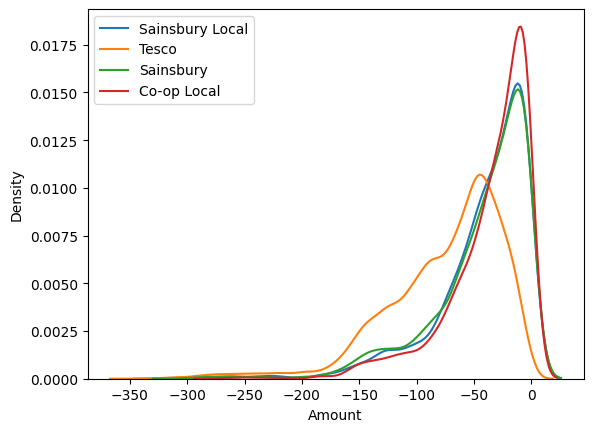

In [25]:
# plot kde plot for all supermarkets
sns.kdeplot(sainsbury_local['Amount'], label='Sainsbury Local')
sns.kdeplot(tesco['Amount'], label='Tesco')
sns.kdeplot(sainsbury['Amount'], label='Sainsbury')
sns.kdeplot(coop_local['Amount'], label='Co-op Local')

plt.legend()
plt.show()

### Sports shops

In [42]:
reebok = merchant_transactions[merchant_transactions['Third Party Name'] == 'Reebok']
sports_direct = merchant_transactions[merchant_transactions['Third Party Name'] == 'Sports Direct']
jd_sports = merchant_transactions[merchant_transactions['Third Party Name'] == 'JD Sports']
mountain_warehouse = merchant_transactions[merchant_transactions['Third Party Name'] == 'Mountain Warehouse']
rugby_fields = merchant_transactions[merchant_transactions['Third Party Name'] == 'RugbyFields']

# concatenate describe() dataframes for all sports stores
sports_stores = pd.concat([reebok['Amount'].describe(),
                            sports_direct['Amount'].describe(),
                            jd_sports['Amount'].describe(),
                            mountain_warehouse['Amount'].describe(),
                            rugby_fields['Amount'].describe()],axis=1)
col_names = ['Reebok', 'Sports Direct', 'JD Sports','Mountain Warehouse','Rugby Fields']
sports_stores.columns = col_names
sports_stores

,Reebok,Sports Direct,JD Sports,Mountain Warehouse,Rugby Fields
count,1920.000000,16248.000000,560.000000,1.0,1.0
mean,-60.993792,-61.277883,-63.993286,-30.0,-140.0
std,41.520906,41.872403,43.852557,NaN,NaN
min,-299.970000,-305.970000,-231.970000,-30.0,-140.0
25%,-82.000000,-81.980000,-88.240000,-30.0,-140.0
50%,-50.000000,-51.980000,-53.940000,-30.0,-140.0
75%,-29.990000,-29.990000,-30.017500,-30.0,-140.0
max,-5.990000,-5.990000,-5.990000,-30.0,-140.0


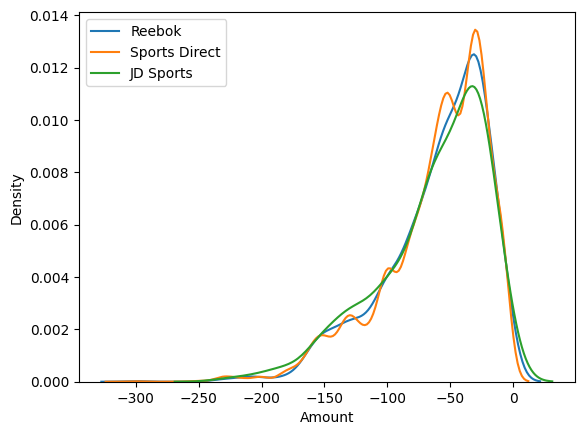

In [27]:
# kde plot for all sports stores
sns.kdeplot(reebok['Amount'], label='Reebok')
sns.kdeplot(sports_direct['Amount'], label='Sports Direct')
sns.kdeplot(jd_sports['Amount'], label='JD Sports')

plt.legend()
plt.show()

### Medical 

In [28]:
university_college_hospital = merchant_transactions[merchant_transactions['Third Party Name'] == 'University College Hospital']
remedy_plus_care= merchant_transactions[merchant_transactions['Third Party Name'] == 'Remedy Plus Care']
vision_expression = merchant_transactions[merchant_transactions['Third Party Name'] == 'Vision Express']
specsavers = merchant_transactions[merchant_transactions['Third Party Name'] == 'Specsavers']

# concatenate describe() dataframes for all health stores
health_stores = pd.concat([university_college_hospital['Amount'].describe(), 
                            remedy_plus_care['Amount'].describe(),
                            vision_expression['Amount'].describe(),
                            specsavers['Amount'].describe()], axis=1)

col_names = ['University College Hospital', 'Remedy Plus Care', 'Vision Express', 'Specsavers']
health_stores.columns = col_names
health_stores

,University College Hospital,Remedy Plus Care,Vision Express,Specsavers
count,1.0,0.0,1.0,1.0
mean,-80.0,NaN,-220.0,-270.0
std,NaN,NaN,NaN,NaN
min,-80.0,NaN,-220.0,-270.0
25%,-80.0,NaN,-220.0,-270.0
50%,-80.0,NaN,-220.0,-270.0
75%,-80.0,NaN,-220.0,-270.0
max,-80.0,NaN,-220.0,-270.0


### Restaurants

In [29]:
frankie_and_bennys = merchant_transactions[merchant_transactions['Third Party Name'] == 'Frankie & Bennies']

# concatenate describe() dataframes for all restaurants
restaurants = pd.concat([frankie_and_bennys['Amount'].describe()], axis=1)
col_names = ['Frankie & Bennies']
restaurants.columns = col_names
restaurants

,Frankie & Bennies
count,2.000000
mean,-135.000000
std,120.208153
min,-220.000000
25%,-177.500000
50%,-135.000000
75%,-92.500000
max,-50.000000


### School stores

In [30]:
town_high = merchant_transactions[merchant_transactions['Third Party Name'] == 'Town High']
lavender_primary = merchant_transactions[merchant_transactions['Third Party Name'] == 'Lavender Primary']
kew_house = merchant_transactions[merchant_transactions['Third Party Name'] == 'Kew House']

# concatenate describe() dataframes for all schools
schools = pd.concat([town_high['Amount'].describe(), 
                            lavender_primary['Amount'].describe(),
                            kew_house['Amount'].describe()], axis=1)
col_names = ['Town High', 'Lavender Primary', 'Kew House']
schools.columns = col_names
schools

,Town High,Lavender Primary,Kew House
count,2.000000,3.000000,3.000000
mean,-140.000000,-163.333333,-203.333333
std,28.284271,104.083300,102.632029
min,-160.000000,-280.000000,-290.000000
25%,-150.000000,-205.000000,-260.000000
50%,-140.000000,-130.000000,-230.000000
75%,-130.000000,-105.000000,-160.000000
max,-120.000000,-80.000000,-90.000000


### Kids stores

In [46]:
merchant_transactions['Third Party Name'].unique()

array(['Halifax', 'LBG', 'Blizzard', 'Xbox', 'Mojang Studios', 'PureGym',
       'Disney', 'Netflix', 'Grand Union BJJ', 'Amazon', 'SquareOnix',
       'Deliveroo', 'JustEat', 'Coop Local', 'Selfridges', 'Sainsbury',
       'AMAZON', 'The Works', "Blackwell's", 'Fat Face', 'Topshop',
       'Matalan', 'Foyles', 'Tesco', 'Wool', 'Hobby Lobby', 'Revella',
       'Sainsbury Local', 'Starbucks', 'Loosely Fitted',
       'Stitch By Stitch', 'Coffee #1', 'Hobbycraft', 'A Yarn Story',
       'Craftastic', 'Kings Arms', 'Costa Coffee', 'The Crown',
       'Lloyds Pharmacy', 'Rose & Crown', 'Fitted Stitch', 'Gamestation',
       'CeX', 'Etsy', 'Five Senses Art', 'Sports Direct', 'Cass Art',
       'Brilliant Brushes', 'Boots', 'Reebok', 'JD Sports', 'Head',
       'Frankie & Bennies', 'Gap Kids', 'North Face', 'Town High',
       'Collector Cave', 'Barbiee Boutique', 'RugbyFields',
       'Mamas & Papas', 'Lavender Primary', 'Remedy plus care',
       'Specsavers', 'Kew House', 'HMV', 'Vision E

In [48]:
mamas_and_papas = merchant_transactions[merchant_transactions['Third Party Name'] == 'Mamas & Papas']
gap_kids = merchant_transactions[merchant_transactions['Third Party Name'] == 'Gap Kids']
barbie_boutique = merchant_transactions[merchant_transactions['Third Party Name'] == 'Barbiee Boutique']
mothercare = merchant_transactions[merchant_transactions['Third Party Name'] == 'Mothercare']
victoria_park = merchant_transactions[merchant_transactions['Third Party Name'] == 'Victoria Park']

# concatenate describe() dataframes for all children stores
children_stores = pd.concat([mamas_and_papas['Amount'].describe(), 
                            gap_kids['Amount'].describe(),
                            barbie_boutique['Amount'].describe(),
                            mothercare['Amount'].describe(),
                            victoria_park['Amount'].describe()], axis=1)
col_names = ['Mamas & Papas', 'Gap Kids', 'Barbiee Boutique', 'Mothercare', 'Victoria Park']
children_stores.columns = col_names
children_stores


,Mamas & Papas,Gap Kids,Barbiee Boutique,Mothercare,Victoria Park
count,3.000000,1.0,1.0,1.0,1.0
mean,-186.666667,-260.0,-270.0,-280.0,-290.0
std,55.075705,NaN,NaN,NaN,NaN
min,-240.000000,-260.0,-270.0,-280.0,-290.0
25%,-215.000000,-260.0,-270.0,-280.0,-290.0
50%,-190.000000,-260.0,-270.0,-280.0,-290.0
75%,-160.000000,-260.0,-270.0,-280.0,-290.0
max,-130.000000,-260.0,-270.0,-280.0,-290.0


### Pet Stores

In [32]:
pets_at_home = merchant_transactions[merchant_transactions['Third Party Name'] == 'Pets at Home']
pets_corner = merchant_transactions[merchant_transactions['Third Party Name'] == 'Pets Corner']

# concatenate describe() dataframes for all pet stores
pet_stores = pd.concat([pets_at_home['Amount'].describe(), 
                            pets_corner['Amount'].describe()], axis=1)
col_names = ['Pets at Home', 'Pets Corner']
pet_stores.columns = col_names
pet_stores


,Pets at Home,Pets Corner
count,0.0,1.0
mean,NaN,-210.0
std,NaN,NaN
min,NaN,-210.0
25%,NaN,-210.0
50%,NaN,-210.0
75%,NaN,-210.0
max,NaN,-210.0
